## KArmedBandit Playground
In this playground, you can run experiments and play with different policies, and different number of bandits
Uses the classes defined in library/environments/k_armed_bandit_env.py

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/bogdanfloris/Downloads/Code/Reinforcement-Learning/')
from library.environments.k_armed_bandit_env import Agent, Bandit, Policy
from library.environments.k_armed_bandit_env import EpsilonGreedyPolicy, UCBPolicy, GreedyWithOptimisticInitPolicy

In [2]:
class BanditExperiment:
    def __init__(self, k, policy, runs, max_time):
        self.runs = runs
        self.max_time = max_time
        self.policy = policy
        self.agent = Agent(k, policy)
        self.bandits = [Bandit() for _ in range(k)]
    
    def run(self):
        """
        Runs the experiment
        """
        print('Running experiment for policy {}'.format(self.policy.__str__()))
        scores = np.zeros(self.max_time, dtype=np.float)
        for _ in range(self.runs):
            for t in range(self.max_time):
                scores[t] += self.play_round()
            self.reset()
        return scores / self.runs

    def play_round(self):
        """
        Plays one round of the experiment. 
        """
        # get the next action
        action = self.agent.choose_action()
        # get a reward from the bandit
        reward = self.bandits[action].get_reward()
        # play the action
        self.agent.play_action(action, reward)
        return reward

    def reset(self):
        """
        Resets the bandits 
        """
        self.agent.reset()
        for bandit in self.bandits:
            bandit.reset()
    
    def print_bandits(self):
        for i, bandit in enumerate(self.bandits):
            print('Bandit {} reward = {}'.format(i, bandit.mu))


In [3]:
# define experiment constants
k = 10           # number of bandits
runs = 2000      # number of experiment runs
max_time = 1000  # maximum time step

In [4]:
# define policies
eps_greedy_001 = EpsilonGreedyPolicy(epsilon=0.01)
eps_greedy_01 = EpsilonGreedyPolicy(epsilon=0.1)
eps_greedy_0 = EpsilonGreedyPolicy(epsilon=0)
optimistic_5 = GreedyWithOptimisticInitPolicy(init_val=5)
optimistic_10 = GreedyWithOptimisticInitPolicy(init_val=10)
ucb_1 = UCBPolicy(c=1)
ucb_2 = UCBPolicy(c=2)

In [5]:
def plot_scores(scores, labels):
    """
    Plots the scores
    :param scores: the scores to plot
    :param labels: labels for legend
    """
    time = range(max_time)
    for score, label in zip(scores, labels):
        sns.lineplot(x=time, y=score, label=label)
    plt.legend(loc='lower right')
    plt.ylim([0.0, 2.0])
    plt.xlabel('Steps')
    plt.ylabel('Avg. Reward')
    plt.show()

In [6]:
# get scores for epsilon greedy policies
scores_eps_greedy_001 = BanditExperiment(k, eps_greedy_001, runs, max_time).run()
scores_eps_greedy_01 = BanditExperiment(k, eps_greedy_01, runs, max_time).run()
scores_eps_greedy_0 = BanditExperiment(k, eps_greedy_0, runs, max_time).run()

Running experiment for policy ε-greedy (ε=0.01)
Running experiment for policy ε-greedy (ε=0.1)
Running experiment for policy ε-greedy (ε=0)


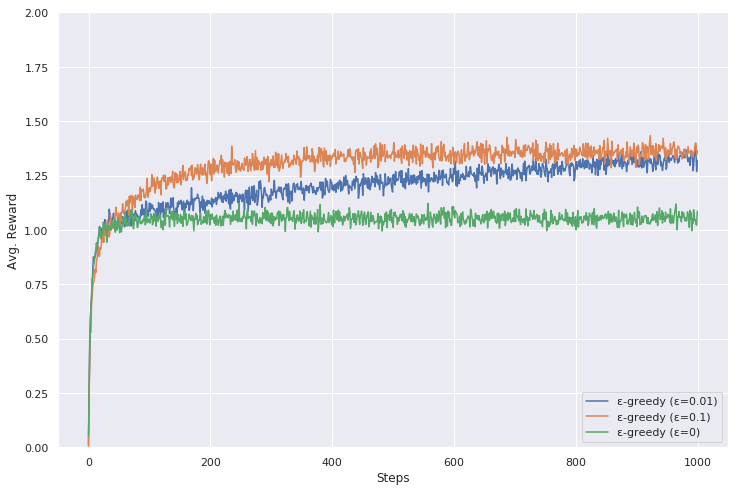

In [7]:
# Figure 2.2 from Sutton and Barto
sns.set(rc={'figure.figsize':(12, 8)})
plot_scores(
    [scores_eps_greedy_001, scores_eps_greedy_01, scores_eps_greedy_0],
    [eps_greedy_001.__str__(), eps_greedy_01.__str__(), eps_greedy_0.__str__()]
)

In [8]:
# get scores for optimistic initialization policies
scores_optimistic_5 = BanditExperiment(k, optimistic_5, runs, max_time).run()
scores_optimistic_10 = BanditExperiment(k, optimistic_10, runs, max_time).run()

Running experiment for policy Greedy With Optimistic Initialization: 5
Running experiment for policy Greedy With Optimistic Initialization: 10


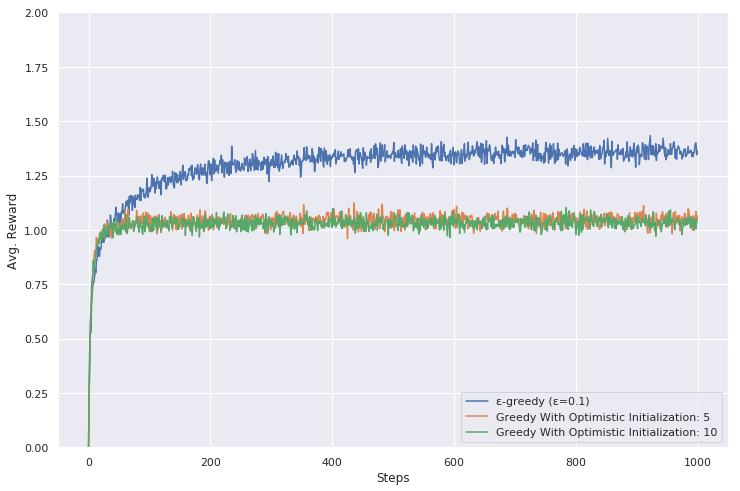

In [9]:
# compare with epsilon greedy 0.1
plot_scores(
    [scores_eps_greedy_01, scores_optimistic_5, scores_optimistic_10],
    [eps_greedy_01.__str__(), optimistic_5.__str__(), optimistic_10.__str__()]
)

In [10]:
# get scores for UCB policies
scores_ucb_2 = BanditExperiment(k, ucb_2, runs, max_time).run()

Running experiment for policy UCB (c=2)


/Users/bogdanfloris/Downloads/Code/Reinforcement-Learning/library/environments/k_armed_bandit_env.py:150: RuntimeWarning: invalid value encountered in true_divide
  exploration = np.log(agent.t + 1) / (2 * agent.action_choices)
/Users/bogdanfloris/Downloads/Code/Reinforcement-Learning/library/environments/k_armed_bandit_env.py:150: RuntimeWarning: divide by zero encountered in true_divide
  exploration = np.log(agent.t + 1) / (2 * agent.action_choices)


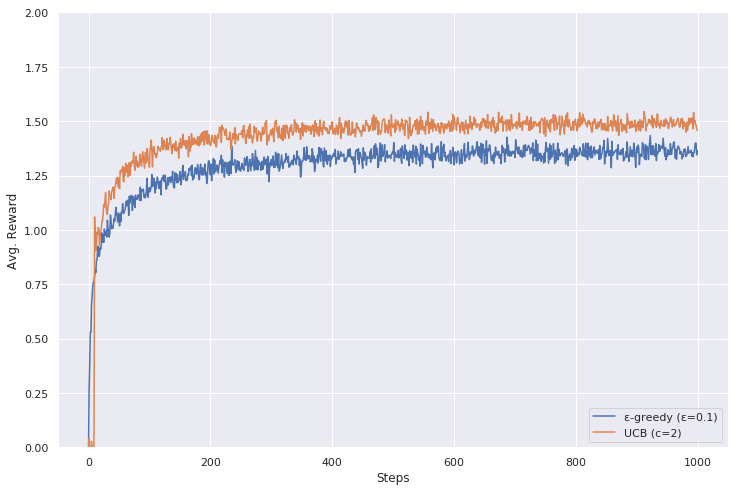

In [11]:
# compare UCB c=2 with Epsilon Greedy 0.1 (Figure 2.4)
plot_scores(
    [scores_eps_greedy_01, scores_ucb_2],
    [eps_greedy_01.__str__(), ucb_2.__str__()]
)